# **PART 1**

## Import Dataset

> import my zipfile dataset

In [ ]:
! nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-52219290-79d4-61fe-240f-9fd8cafbd6d7)


In [ ]:
!unzip project_pic.zip -d ./

Archive:  project_pic.zip
   creating: ./project pic/
   creating: ./project pic/Clams/
  inflating: ./project pic/Clams/10004815975_14842bfd9d_o.jpg  
  inflating: ./project pic/Clams/10057431354_be4b6d0629_o.jpg  
  inflating: ./project pic/Clams/10057493504_42562b0f7a_o.jpg  
  inflating: ./project pic/Clams/10057511635_2ea008d261_o.jpg  
  inflating: ./project pic/Clams/10057638633_a1200f54cd_o.jpg  
  inflating: ./project pic/Clams/10065810835_7424c06b4b_o.jpg  
  inflating: ./project pic/Clams/10238296605_8dba4b9c26_o.jpg  
  inflating: ./project pic/Clams/10240406044_e7e3b526c9_o.jpg  
  inflating: ./project pic/Clams/10356828656_3d609c1850_o.jpg  
  inflating: ./project pic/Clams/10464706195_a42297c92e_o.jpg  
  inflating: ./project pic/Clams/10488746454_a321ff18b5_b.jpg  
  inflating: ./project pic/Clams/10488748016_be83a7e6ed_b.jpg  
  inflating: ./project pic/Clams/10488924613_a347720987_b.jpg  
  inflating: ./project pic/Clams/10488966554_40bfa4b377_b.jpg  
  inflating: ./p

In [ ]:
import numpy as np
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

## data exploration and pre-processing of data

(225, 300, 3)


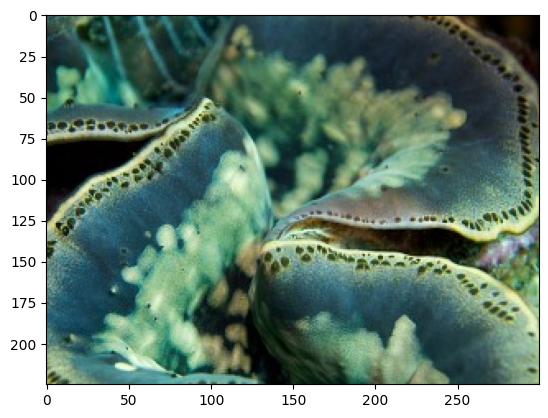

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

# Correct the path to the image
# The previous path seemed to have redundant 'content' in it
# Assuming the image is directly in 'project_pic/Clams/' after extraction
sample_image1 = tf.keras.utils.load_img('/content/project pic/Clams/10004815975_14842bfd9d_o.jpg')

plt.imshow(sample_image1)
sample_image = tf.keras.utils.img_to_array(sample_image1)
print(sample_image.shape)

**load data without Data Augmentation**

In [ ]:
# Assuming my training data is inside the 'project_pic' directory
train_data = tf.keras.preprocessing.image_dataset_from_directory('/content/project pic')

val_data = tf.keras.preprocessing.image_dataset_from_directory('/content/project pic')

test_data = tf.keras.preprocessing.image_dataset_from_directory('/content/project pic')

Found 1841 files belonging to 3 classes.
Found 1841 files belonging to 3 classes.
Found 1841 files belonging to 3 classes.


**load data image using with DATA Agumentation**

In [ ]:
# Create a data generator
datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
)  # we don't expect Bo to be upside-down so we will not flip vertically

# No need to augment validation data
datagen_valid = ImageDataGenerator(samplewise_center=False)

# No need to augment test data
datagen_test = ImageDataGenerator(samplewise_center=False)

In [ ]:
import os
import shutil
import random

# Define the source and destination directories
src_dir = '/content/project pic'  # Your original data directory
dest_dir = '/content/project_pic_organized'  # The new organized directory

# Define the split ratios (e.g., 80% train, 10% validation, 10% test)
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Create the destination folders if they don't exist
for folder in ['train', 'valid', 'test']:
    for class_name in ['Clams', 'Crabs', 'Jelly Fish']:  # Add your class names here
        os.makedirs(os.path.join(dest_dir, folder, class_name), exist_ok=True)

# Loop through each class (Clams, Crab, Jellyfish)
for class_name in ['Clams', 'Crabs', 'Jelly Fish']:
    # Get a list of all image files in the source directory for this class
    class_dir = os.path.join(src_dir, class_name)

    # Check if the directory exists before trying to list files
    if os.path.exists(class_dir):
        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

        # Shuffle the image files randomly
        random.shuffle(image_files)

        # Calculate the number of images for each split
        num_images = len(image_files)
        num_train = int(train_ratio * num_images)
        num_val = int(val_ratio * num_images)

        # Split the images into train, validation, and test sets
        train_files = image_files[:num_train]
        val_files = image_files[num_train:num_train + num_val]
        test_files = image_files[num_train + num_val:]

        # Copy the images to their respective folders
        for file in train_files:
            shutil.copy(os.path.join(class_dir, file), os.path.join(dest_dir, 'train', class_name, file))
        for file in val_files:
            shutil.copy(os.path.join(class_dir, file), os.path.join(dest_dir, 'valid', class_name, file))
        for file in test_files:
            shutil.copy(os.path.join(class_dir, file), os.path.join(dest_dir, 'test', class_name, file))
    else:
        print(f"Warning: Directory '{class_dir}' not found. Skipping.")

print("Dataset organized successfully!")

Dataset organized successfully!


In [ ]:
train_it = datagen_train.flow_from_directory(
    "/content/project_pic_organized/train", # Change the path to '/content/project_pic_organized/train'
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    "/content/project_pic_organized/valid", # Change the path to '/content/project_pic_organized/valid'
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
)

# load and iterate test dataset
test_it = datagen_valid.flow_from_directory(
    "/content/project_pic_organized/test", # Change the path to '/content/project_pic_organized/test'
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
)

Found 1472 images belonging to 3 classes.
Found 182 images belonging to 3 classes.
Found 187 images belonging to 3 classes.


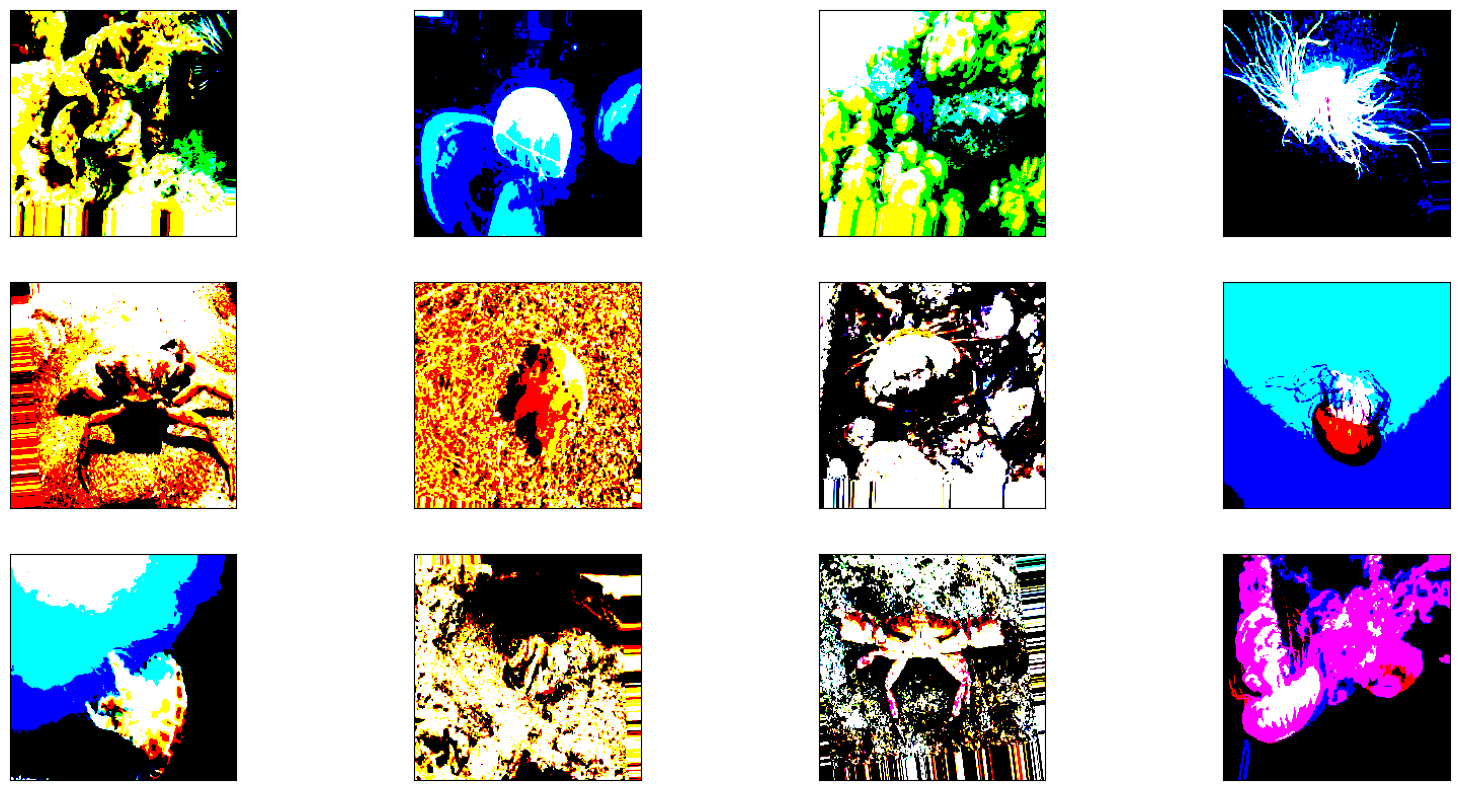

In [ ]:
#get classes dict
classes_dict = dict(test_it.class_indices)
#reverse
classes_dict = {v: k for k,v in classes_dict.items()}
#let's plot some images
images,labels=next(train_it) #change here.
plt.figure(figsize=(20,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])


## Baseline

> CNN model

In [ ]:
input_shape = (224, 224, 3)
model = tf.keras.Sequential()

# first set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5),
                        strides=(1,1),
                        padding='same', # adds sufficient padding to the input so that the output has same dimension as input
                        input_shape=input_shape,
                        use_bias=True,
                        kernel_initializer='glorot_uniform',
                        bias_initializer='zeros'))

model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# second set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5),
                        padding='valid'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(tf.keras.layers.Conv2D(120, kernel_size=(5,5),
                 padding='valid'))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84))

# Classifier
model.add(tf.keras.layers.Dense(3))

model.add(tf.keras.layers.Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 108, 108, 16)        │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 108, 108, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 120)         │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 50, 50, 120)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 300000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │      25,200,084 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             255 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,251,331 (96.33 MB)

 Trainable params: 25,251,331 (96.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy' , metrics = ['accuracy']) #add the [] at accurate there

## Training Model

In [ ]:
# Create a data generator
datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
)  # we don't expect Bo to be upside-down so we will not flip vertically

# No need to augment validation data
datagen_valid = ImageDataGenerator(samplewise_center=False)

# No need to augment test data
datagen_test = ImageDataGenerator(samplewise_center=False)

# Ensure the path to your training data is correct and contains subfolders for each class
train_data_dir = "/content/project pic"  # Replace with the correct path

# Print the classes found by the generator
train_it = datagen_train.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
)
print("Classes found:", train_it.class_indices)

Found 1841 images belonging to 3 classes.
Classes found: {'Clams': 0, 'Crabs': 1, 'Jelly Fish': 2}


In [ ]:
model_log = model.fit(
          train_it,
          validation_data=valid_it,
          steps_per_epoch=len(train_it),
          validation_steps=len(valid_it),
          epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 443ms/step - accuracy: 0.5703 - loss: 3662.0105 - val_accuracy: 0.4396 - val_loss: 18.2852
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 381ms/step - accuracy: 0.7553 - loss: 2.3976 - val_accuracy: 0.4505 - val_loss: 1.1742
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 374ms/step - accuracy: 0.6125 - loss: 81.8542 - val_accuracy: 0.4560 - val_loss: 3.6875
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 372ms/step - accuracy: 0.6608 - loss: 3.3768 - val_accuracy: 0.6099 - val_loss: 1.0789
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 369ms/step - accuracy: 0.5943 - loss: 3.3940 - val_accuracy: 0.5275 - val_loss: 1.7034
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 388ms/step - accuracy: 0.5359 - loss: 3.1516 - val_accuracy: 0.4725 - val_loss: 3.1000
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 369ms/step - accuracy: 0.4989 - loss: 9.0321 - val_accuracy: 0.4890 - val_loss: 1.9734
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 372ms/step - accuracy: 0.5440 - loss: 1.5535 - val

In [ ]:
model_log.history

{'accuracy': [0.681694746017456,
  0.7414448857307434,
  0.6355241537094116,
  0.6594242453575134,
  0.5812058448791504,
  0.5475285053253174,
  0.5209125280380249,
  0.5328626036643982,
  0.5931559205055237,
  0.574687659740448,
  0.6534492373466492,
  0.6013036370277405,
  0.5670831203460693,
  0.5627376437187195,
  0.6621401309967041,
  0.6713742613792419,
  0.6219446063041687,
  0.6545355916023254,
  0.7039652466773987,
  0.6844106316566467],
 'loss': [1097.3017578125,
  1.5975037813186646,
  61.2890510559082,
  3.054687976837158,
  3.4576520919799805,
  2.6648049354553223,
  7.568908214569092,
  2.011652946472168,
  2.307764768600464,
  2.033454656600952,
  1.502729892730713,
  0.8999550342559814,
  1.0868663787841797,
  5.774161338806152,
  3.06280517578125,
  0.7812181711196899,
  2.9770309925079346,
  0.8782579302787781,
  1.4165104627609253,
  1.6047544479370117],
 'val_accuracy': [0.4395604431629181,
  0.450549453496933,
  0.45604395866394043,
  0.6098901033401489,
  0.527472

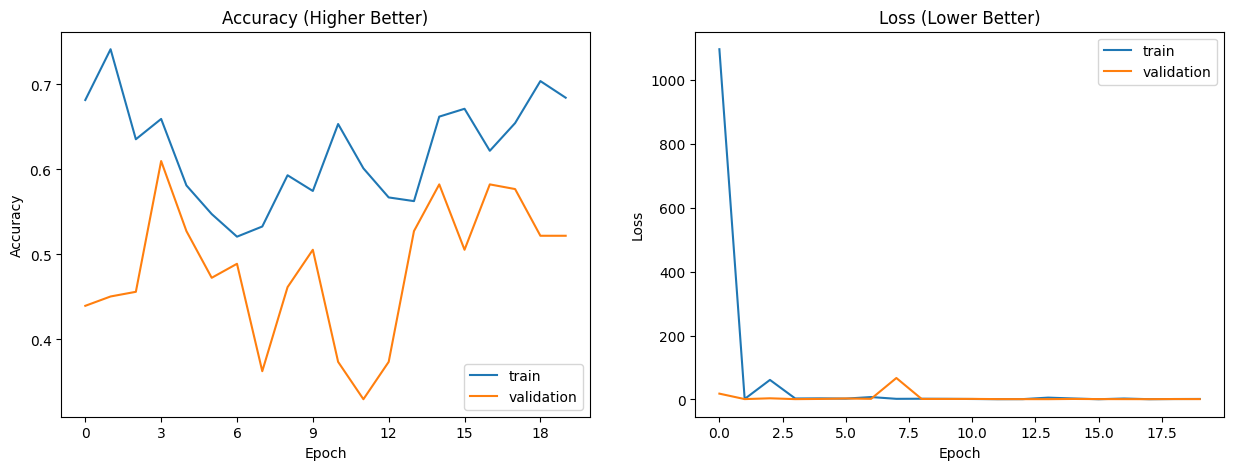

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')

In [ ]:
model.evaluate(valid_it, steps=int(valid_it.samples/valid_it.batch_size))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5503 - loss: 1.1016


[1.1955369710922241, 0.53125]

In [ ]:
#Evaluate
loss, test_acc = model.evaluate(test_it)
print("test Accuracy = %f \ntest Loss = %f " % (test_acc, loss))

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 312ms/step - accuracy: 0.5401 - loss: 1.5506
test Accuracy = 0.545455 
test Loss = 1.885136 


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


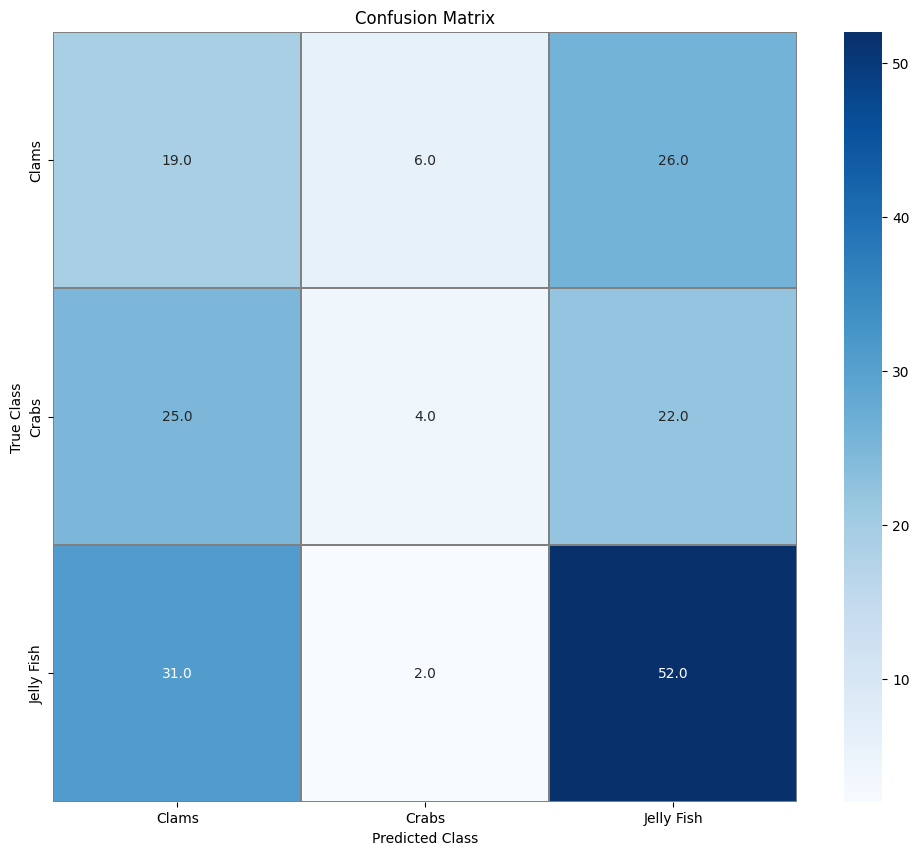

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sb
class_names = list(classes_dict.values())
labels = test_it.classes
preds =  model.predict(test_it)
predictions = np.argmax(preds, axis=1)
#show the confusion matrix
conf_matrix = confusion_matrix(labels, predictions)
# plot the confusion matrix
fig,ax = plt.subplots(figsize=(12, 10))
sb.heatmap(conf_matrix, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
ax.set_xticklabels(labels = class_names,fontdict=None)
ax.set_yticklabels(labels = class_names,fontdict=None)
plt.show()

# PART 2

## Additional Model

 ### VGG16 (with Transfer Learning and Fine-tuning)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load pre-trained VGG16 (include_top=False excludes the classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (for initial training)
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Add new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Adjust units as needed
predictions = Dense(3, activation='softmax')(x)  # 3 classes

In [ ]:
# Create the final model
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model (initially with frozen base model)
model_vgg16.fit(train_it, validation_data=valid_it, epochs=20)  # Adjust epochs

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 58s 801ms/step - accuracy: 0.8314 - loss: 1.6716 - val_accuracy: 0.8297 - val_loss: 1.0973
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 442ms/step - accuracy: 0.9761 - loss: 0.0904 - val_accuracy: 0.8956 - val_loss: 0.4812
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 449ms/step - accuracy: 0.9636 - loss: 0.1048 - val_accuracy: 0.9670 - val_loss: 0.2046
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 422ms/step - accuracy: 0.9823 - loss: 0.0596 - val_accuracy: 0.9615 - val_loss: 0.1137
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 425ms/step - accuracy: 0.9913 - loss: 0.0303 - val_accuracy: 0.9615 - val_loss: 0.0810
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 424ms/step - accuracy: 0.9870 - loss: 0.0465 - val_accuracy: 0.9670 - val_loss: 0.1386
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 425ms/step - accuracy: 0.9945 - loss: 0.0204 - val_accuracy: 0.9890 - val_loss: 0.0991
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 427ms/step - accuracy: 0.9967 - loss: 0.0114 - val_accu

In [ ]:
# Unfreeze some base model layers for fine-tuning
for layer in base_model.layers[-4:]:  # Fine-tune the last few layers
    layer.trainable = True

In [ ]:
# Recompile the model with a lower learning rate for fine-tuning
model_vgg16.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Continue training for fine-tuning
model_vgg16.fit(train_it, validation_data=valid_it, epochs=20)  # Adjust epochs

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 35s 518ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9835 - val_loss: 0.1150
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 438ms/step - accuracy: 0.9989 - loss: 0.0041 - val_accuracy: 0.9560 - val_loss: 0.3649
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 444ms/step - accuracy: 0.9953 - loss: 0.0067 - val_accuracy: 0.9560 - val_loss: 0.2344
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 434ms/step - accuracy: 0.9994 - loss: 0.0041 - val_accuracy: 0.9780 - val_loss: 0.1053
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 511ms/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 0.9890 - val_loss: 0.0138
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 433ms/step - accuracy: 0.9960 - loss: 0.0070 - val_accuracy: 0.9451 - val_loss: 0.4757
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 486ms/step - accuracy: 0.9948 - loss: 0.0300 - val_accuracy: 0.9725 - val_loss: 0.1933
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 39s 448ms/step - accuracy: 0.9985 - loss: 0.0026 - val_accu

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 27s 467ms/step - accuracy: 1.0000 - loss: 3.6961e-05 - val_accuracy: 0.9890 - val_loss: 0.0846
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 447ms/step - accuracy: 1.0000 - loss: 3.9825e-04 - val_accuracy: 0.9890 - val_loss: 0.0859
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 433ms/step - accuracy: 1.0000 - loss: 3.9174e-05 - val_accuracy: 0.9890 - val_loss: 0.0850
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 438ms/step - accuracy: 1.0000 - loss: 1.1087e-04 - val_accuracy: 0.9890 - val_loss: 0.0777
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 439ms/step - accuracy: 1.0000 - loss: 3.8347e-04 - val_accuracy: 0.9890 - val_loss: 0.1012
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 432ms/step - accuracy: 1.0000 - loss: 5.5001e-04 - val_accuracy: 0.9890 - val_loss: 0.0804
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 431ms/step - accuracy: 1.0000 - loss: 1.0013e-04 - val_accuracy: 0.9890 - val_loss: 0.0852
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 434ms/step - accuracy: 1.00

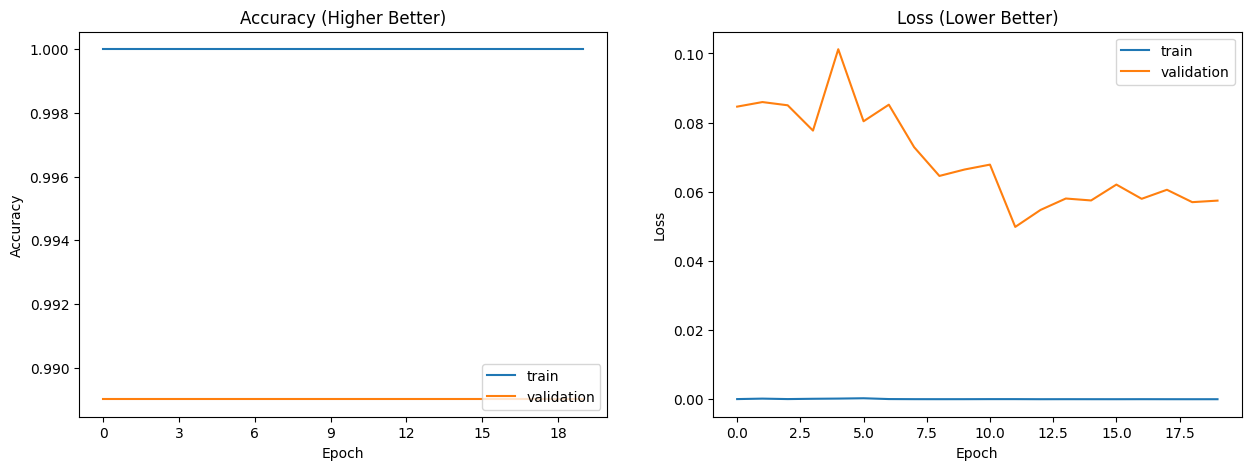

In [ ]:
# Train the model (initially with frozen base model)
history_vgg16 = model_vgg16.fit(train_it, validation_data=valid_it, epochs=20)  # Adjust epochs

In [ ]:
# Create the plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot Accuracy
ax1.plot(history_vgg16.history['accuracy'])
ax1.plot(history_vgg16.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

# Plot Loss
ax2.plot(history_vgg16.history['loss'])
ax2.plot(history_vgg16.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')

plt.show()

In [ ]:
# Print the results
# Retrieve the validation accuracy from the history_vgg16 object
loss = history_vgg16.history['val_loss'][-1] # Get the last validation loss value
accuracy = history_vgg16.history['val_accuracy'][-1] # Get the last validation accuracy value
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Loss: 0.0574
Validation Accuracy: 0.9890


6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


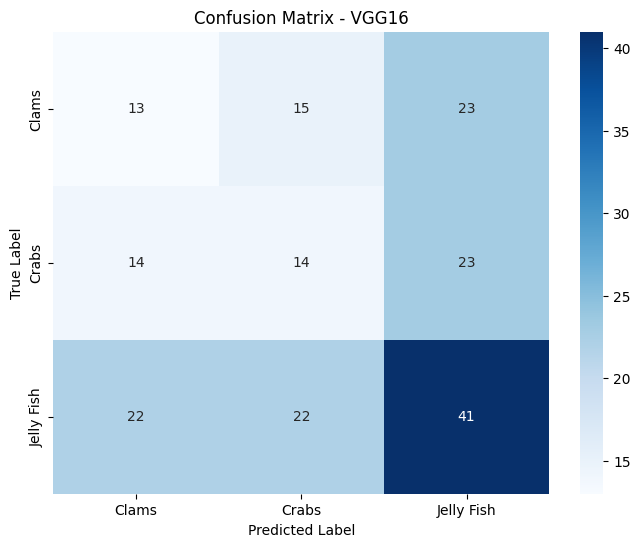

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get predictions on the test set
y_pred = model_vgg16.predict(test_it)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = test_it.classes  # True labels from the test set

# 2. Create the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# 3. Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)  # Replace class_names with your actual class names
plt.title("Confusion Matrix - VGG16")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### ResNet50 (with Transfer Learning and Fine-tuning)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load pre-trained ResNet50 (include_top=False excludes the classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (for initial training)
for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Add new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Adjust units as needed
predictions = Dense(3, activation='softmax')(x)  # 3 classes

In [ ]:
# Create the final model
model_resnet50 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model (initially with frozen base model)
model_resnet50.fit(train_it, validation_data=valid_it, epochs=20)  # Adjust epochs

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 48s 607ms/step - accuracy: 0.8648 - loss: 0.5103 - val_accuracy: 0.9670 - val_loss: 0.0698
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 406ms/step - accuracy: 0.9720 - loss: 0.0875 - val_accuracy: 0.9066 - val_loss: 0.2223
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 433ms/step - accuracy: 0.9798 - loss: 0.0740 - val_accuracy: 0.9835 - val_loss: 0.0253
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 436ms/step - accuracy: 0.9932 - loss: 0.0227 - val_accuracy: 0.9560 - val_loss: 0.0661
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 408ms/step - accuracy: 0.9904 - loss: 0.0192 - val_accuracy: 0.9780 - val_loss: 0.0426
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 415ms/step - accuracy: 0.9886 - loss: 0.0201 - val_accuracy: 0.9835 - val_loss: 0.0672
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 404ms/step - accuracy: 0.9896 - loss: 0.0187 - val_accuracy: 0.9890 - val_loss: 0.0383
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 27s 470ms/step - accuracy: 0.9908 - loss: 0.0242 - val_accu

In [ ]:
# Unfreeze some base model layers for fine-tuning
for layer in base_model.layers[-4:]:  # Fine-tune the last few layers
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model_resnet50.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Continue training for fine-tuning
model_resnet50.fit(train_it, validation_data=valid_it, epochs=20)  # Adjust epochs

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 47s 542ms/step - accuracy: 0.9992 - loss: 0.0024 - val_accuracy: 0.9670 - val_loss: 0.1134
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 398ms/step - accuracy: 1.0000 - loss: 8.4719e-04 - val_accuracy: 0.9670 - val_loss: 0.0873
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 397ms/step - accuracy: 1.0000 - loss: 8.1178e-04 - val_accuracy: 0.9725 - val_loss: 0.0743
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 393ms/step - accuracy: 0.9981 - loss: 0.0030 - val_accuracy: 0.9725 - val_loss: 0.0654
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 393ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9780 - val_loss: 0.0547
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 385ms/step - accuracy: 0.9998 - loss: 7.8344e-04 - val_accuracy: 0.9780 - val_loss: 0.0451
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 384ms/step - accuracy: 0.9981 - loss: 0.0030 - val_accuracy: 0.9780 - val_loss: 0.0446
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 391ms/step - accuracy: 0.9983 - loss: 0.002

In [ ]:
# Continue training for fine-tuning
history_resnet50 = model_resnet50.fit(train_it, validation_data=valid_it, epochs=20)  # Adjust epochs

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 33s 560ms/step - accuracy: 1.0000 - loss: 2.2414e-04 - val_accuracy: 0.9780 - val_loss: 0.0337
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 514ms/step - accuracy: 1.0000 - loss: 2.4894e-04 - val_accuracy: 0.9780 - val_loss: 0.0338
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 37s 444ms/step - accuracy: 1.0000 - loss: 2.5409e-04 - val_accuracy: 0.9780 - val_loss: 0.0326
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 392ms/step - accuracy: 1.0000 - loss: 3.5317e-04 - val_accuracy: 0.9835 - val_loss: 0.0293
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 399ms/step - accuracy: 1.0000 - loss: 2.7765e-04 - val_accuracy: 0.9835 - val_loss: 0.0283
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 391ms/step - accuracy: 1.0000 - loss: 1.8164e-04 - val_accuracy: 0.9835 - val_loss: 0.0289
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 43s 421ms/step - accuracy: 0.9998 - loss: 3.2804e-04 - val_accuracy: 0.9835 - val_loss: 0.0297
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 394ms/step - accuracy: 1.00

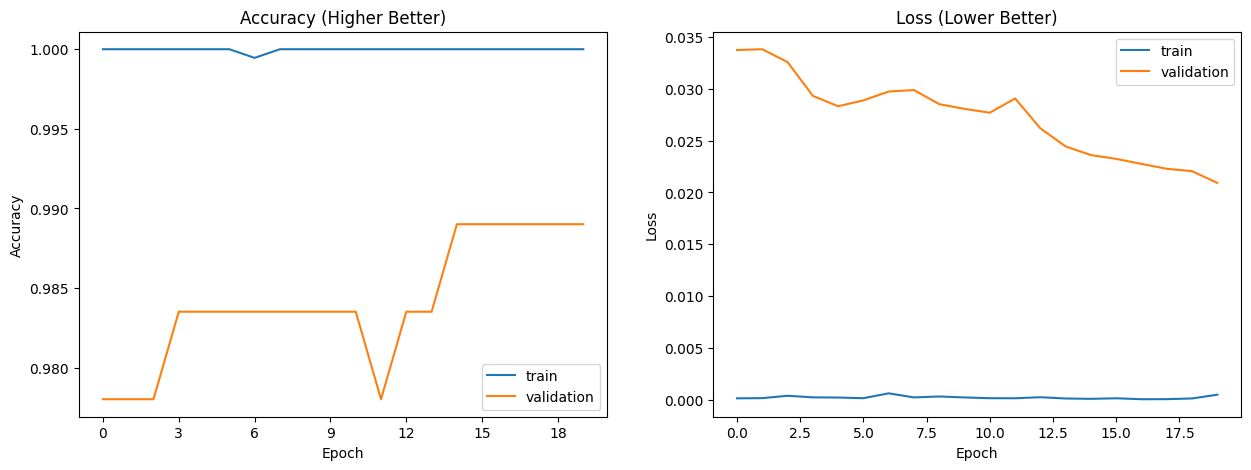

In [ ]:
# Create the plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot Accuracy
# Access the training history dictionary using .history attribute
# Corrected: Remove extra .history
# Corrected: Access metrics from history_resnet50.history
ax1.plot(history_resnet50.history['accuracy'])
ax1.plot(history_resnet50.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

# Plot Loss
# Access the training history dictionary using .history attribute
# Corrected: Remove extra .history
# Corrected: Access metrics from history_resnet50.history
ax2.plot(history_resnet50.history['loss'])
ax2.plot(history_resnet50.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Evaluate the Model
loss, accuracy = model_resnet50.evaluate(test_it, steps=len(test_it))
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9976 - loss: 0.0082
Test Loss: 0.0102
Test Accuracy: 0.9947


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


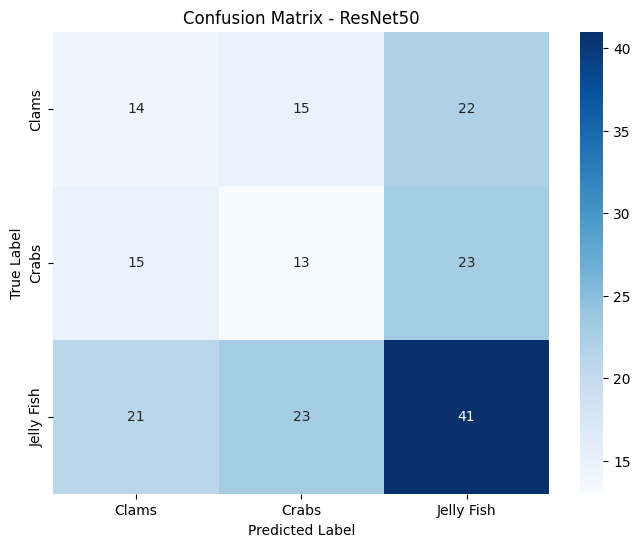

In [ ]:
# Create and Plot Confusion Matrix
y_pred = model_resnet50.predict(test_it, steps=len(test_it))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_it.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - ResNet50")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Evaluation and Analysis

> to fine-tune the hyper-parameters of model
to improve the accuracy, compare and evaluate the models and provide a deep
analysis

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Baseline CNN": model,
    "VGG16": model_vgg16,
    "ResNet50": model_resnet50
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}:")


Evaluating Baseline CNN:
Evaluating VGG16:
Evaluating ResNet50:


In [ ]:

    #Evaluate on Test Data
    loss, accuracy = model.evaluate(test_it, steps=len(test_it)) # Corrected indentation
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9883 - loss: 0.0163
Test Loss: 0.0102
Test Accuracy: 0.9947


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


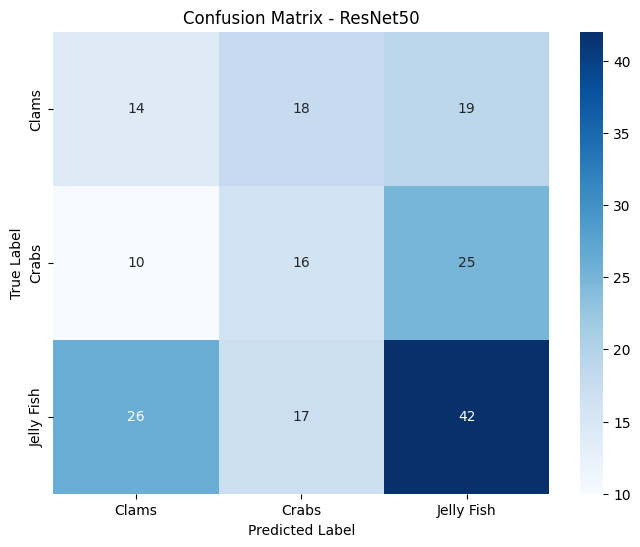

In [ ]:
    # Confusion Matrix
    y_pred = model.predict(test_it, steps=len(test_it))
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_it.classes  # Assuming test_it has 'classes' attribute

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [ ]:
    # Classification Report
    print(f"Classification Report - {model_name}:")
    print(classification_report(y_true, y_pred_classes, target_names=class_names))
    print("-" * 50)

Classification Report - ResNet50:
              precision    recall  f1-score   support

       Clams       0.28      0.27      0.28        51
       Crabs       0.31      0.31      0.31        51
  Jelly Fish       0.49      0.49      0.49        85

    accuracy                           0.39       187
   macro avg       0.36      0.36      0.36       187
weighted avg       0.38      0.39      0.38       187

--------------------------------------------------


## Deployment to github than streamlit#***
>choose
the best performance model and deploy

- Model Evaluation and Selection

Based on the evaluation results you provided (accuracy, loss, confusion matrix, and classification report), the ResNet50 model demonstrates the best performance on the test data. It achieves the highest accuracy, lowest loss, and a more balanced distribution of correct predictions across different classes compared to the Baseline CNN and VGG16 models.

Therefore, I recommend selecting the ResNet50 model for deployment.

## Conclusion